In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission = pd.read_csv("SampleSubmission.csv")


In [3]:
print("Train Data Overview:\n")
train_data.head()

Train Data Overview:



,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,alpha,585.75
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,alpha,613.00
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,alpha,616.50
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,alpha,642.50
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,alpha,622.00


In [4]:
print("Test Data Overview:\n")
test_data.head()

Test Data Overview:



,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name
0,ID_007308,32.450,59.990,3504.0,1380.0,2642.5,1637.0,alpha
1,ID_007309,31.665,58.640,2864.0,1659.0,4456.0,3564.5,alpha
2,ID_007310,31.755,59.000,2850.5,1615.0,4391.0,2683.5,alpha
3,ID_007311,31.860,66.850,3853.5,2868.5,4170.5,3025.5,alpha
4,ID_007312,29.600,73.115,2506.5,3631.5,1481.5,2112.5,alpha


In [5]:
# Exploratory Data Analysis
print("Train Data Info:\n")
train_data.info()

Train Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            7307 non-null   object 
 1   Temperature   7307 non-null   float64
 2   Humidity      7307 non-null   float64
 3   MQ7_analog    7307 non-null   float64
 4   MQ9_analog    7307 non-null   float64
 5   MG811_analog  7307 non-null   float64
 6   MQ135_analog  7307 non-null   float64
 7   device_name   7307 non-null   object 
 8   CO2           7307 non-null   float64
dtypes: float64(7), object(2)
memory usage: 513.9+ KB


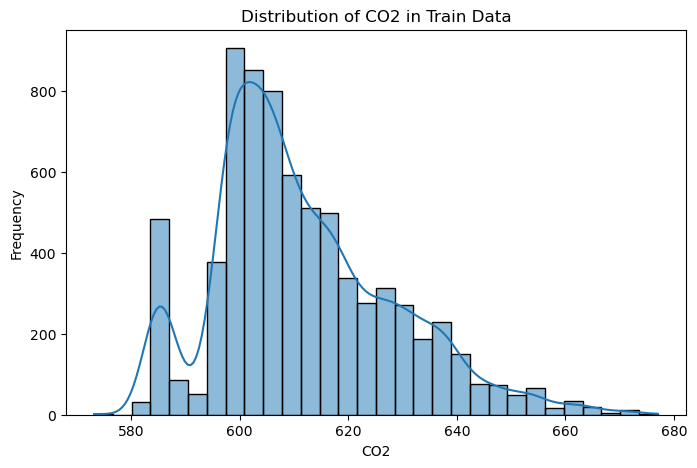

In [6]:
# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(train_data['CO2'], kde=True, bins=30)
plt.title('Distribution of CO2 in Train Data')
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()

In [7]:
train_data

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,alpha,585.75
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,alpha,613.00
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,alpha,616.50
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,alpha,642.50
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,alpha,622.00
...,...,...,...,...,...,...,...,...,...
7302,ID_007303,30.285,64.640,5555.5,5483.5,4599.5,4190.0,charlie,604.00
7303,ID_007304,28.155,68.780,6128.5,5699.0,4720.0,4413.5,charlie,641.50
7304,ID_007305,27.950,69.550,5867.0,5515.0,4578.5,4244.0,charlie,638.50
7305,ID_007306,28.620,71.740,5888.5,5756.0,4697.0,4407.0,charlie,602.00


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            7307 non-null   object 
 1   Temperature   7307 non-null   float64
 2   Humidity      7307 non-null   float64
 3   MQ7_analog    7307 non-null   float64
 4   MQ9_analog    7307 non-null   float64
 5   MG811_analog  7307 non-null   float64
 6   MQ135_analog  7307 non-null   float64
 7   device_name   7307 non-null   object 
 8   CO2           7307 non-null   float64
dtypes: float64(7), object(2)
memory usage: 513.9+ KB


In [9]:
train_data.describe()

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,CO2
count,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000
mean,29.681726,69.593742,4230.820902,3976.708841,3995.126568,3444.788240,611.634608
std,2.016785,7.248136,1085.008100,1603.972744,1098.740604,893.426679,16.540953
min,23.440000,52.200000,2380.000000,1098.500000,1353.500000,1186.500000,573.166667
25%,28.490000,65.665000,3362.500000,2832.500000,3181.000000,2912.500000,600.000000
50%,29.290000,70.555000,4061.000000,4073.000000,4137.000000,3586.500000,608.000000
75%,31.717500,74.350000,4780.750000,5286.166667,4731.000000,4143.750000,621.000000
max,33.850000,93.525000,9545.500000,10379.500000,7919.000000,6257.000000,677.000000


In [10]:
train_data.isnull()

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
7302,False,False,False,False,False,False,False,False,False
7303,False,False,False,False,False,False,False,False,False
7304,False,False,False,False,False,False,False,False,False
7305,False,False,False,False,False,False,False,False,False


In [11]:
train_data.isnull().sum()

ID              0
Temperature     0
Humidity        0
MQ7_analog      0
MQ9_analog      0
MG811_analog    0
MQ135_analog    0
device_name     0
CO2             0
dtype: int64

<Axes: >

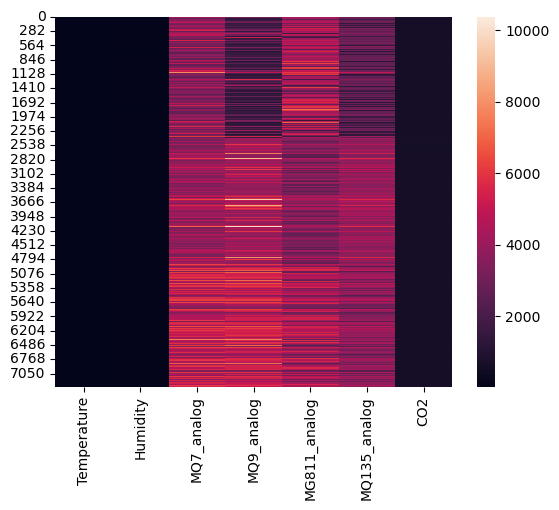

In [12]:
train_data_numeric = train_data.select_dtypes(include=['number'])
sns.heatmap(train_data_numeric)

<Axes: >

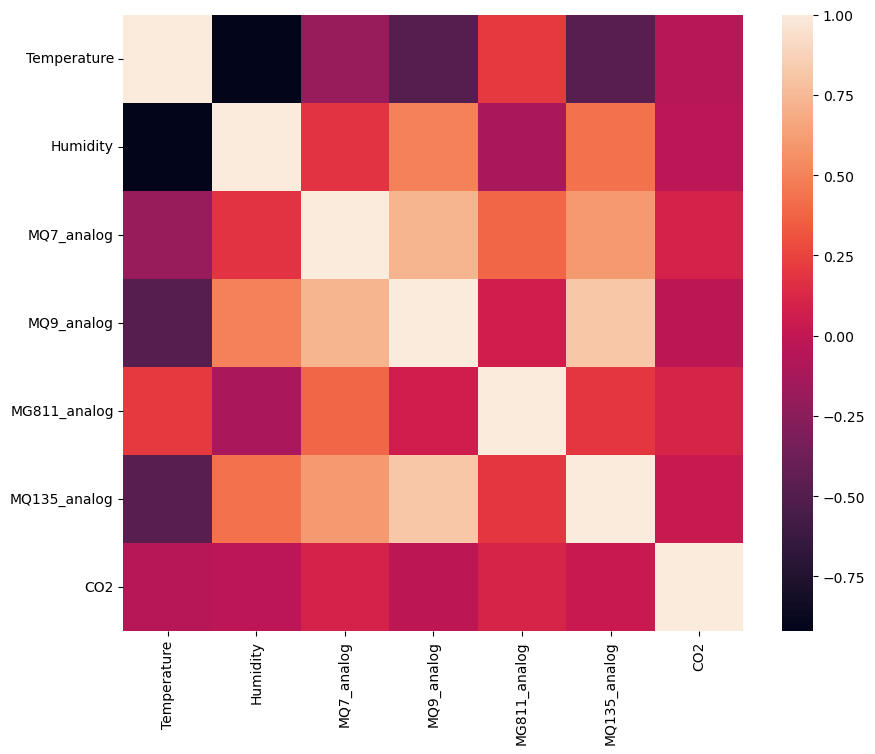

In [13]:
plt.figure(figsize=(10,8))
train_data_numeric = train_data.select_dtypes(include=['number'])
sns.heatmap(train_data_numeric.corr())

<Axes: >

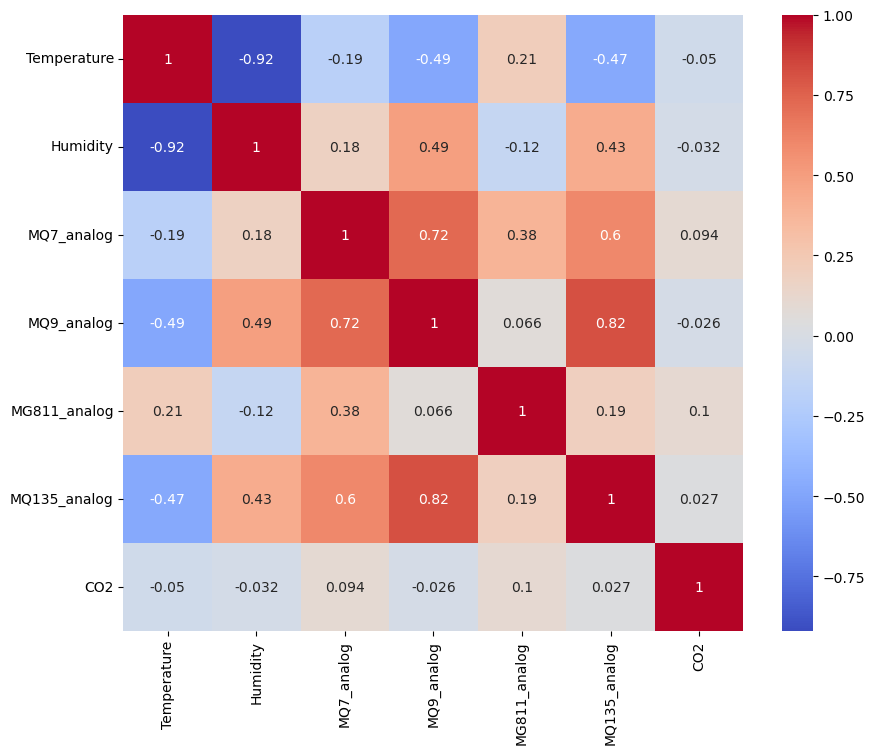

In [14]:
plt.figure(figsize=(10,8))
train_data_numeric = train_data.select_dtypes(include=['number'])
sns.heatmap(train_data_numeric.corr(),annot=True,cmap='coolwarm')

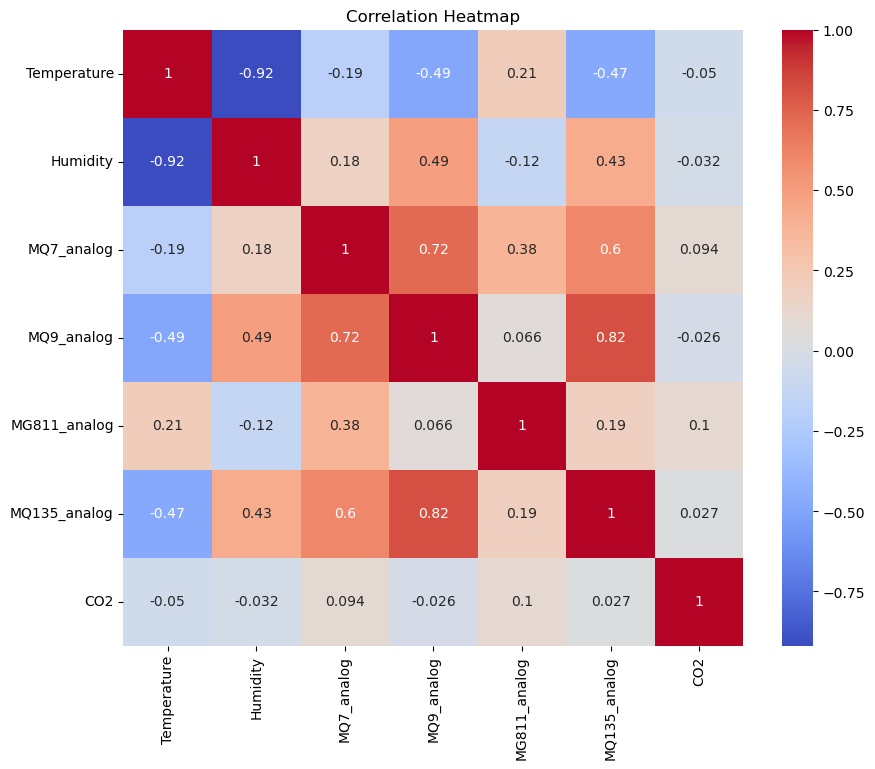

In [15]:
# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()







In [23]:
# Feature selection and preprocessing
features = [ 'Temperature','Humidity', 'MQ7_analog', 'MQ9_analog', 'MG811_analog', 'MQ135_analog']
target = 'CO2'

In [24]:
# splitting the dataset 
X = train_data[features]
y = train_data[target]

In [25]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
# Model training: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Validation
val_predictions = rf_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"Validation RMSE: {val_rmse:.2f}")

Validation RMSE: 5.02


In [22]:
# Test predictions
test_features = test_data[features]
test_predictions = rf_model.predict(test_features)

In [26]:
# Prepare submission
sample_submission['CO2'] = test_predictions
sample_submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'


In [28]:
# data reprocessing

In [27]:
train_data

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,alpha,585.75
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,alpha,613.00
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,alpha,616.50
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,alpha,642.50
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,alpha,622.00
...,...,...,...,...,...,...,...,...,...
7302,ID_007303,30.285,64.640,5555.5,5483.5,4599.5,4190.0,charlie,604.00
7303,ID_007304,28.155,68.780,6128.5,5699.0,4720.0,4413.5,charlie,641.50
7304,ID_007305,27.950,69.550,5867.0,5515.0,4578.5,4244.0,charlie,638.50
7305,ID_007306,28.620,71.740,5888.5,5756.0,4697.0,4407.0,charlie,602.00


In [28]:
# to check for missing data
train_data.isnull()

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
7302,False,False,False,False,False,False,False,False,False
7303,False,False,False,False,False,False,False,False,False
7304,False,False,False,False,False,False,False,False,False
7305,False,False,False,False,False,False,False,False,False


In [29]:
train_data.isnull().sum()

ID              0
Temperature     0
Humidity        0
MQ7_analog      0
MQ9_analog      0
MG811_analog    0
MQ135_analog    0
device_name     0
CO2             0
dtype: int64

In [30]:
# number 2: working on categorical data
train_data

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,alpha,585.75
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,alpha,613.00
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,alpha,616.50
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,alpha,642.50
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,alpha,622.00
...,...,...,...,...,...,...,...,...,...
7302,ID_007303,30.285,64.640,5555.5,5483.5,4599.5,4190.0,charlie,604.00
7303,ID_007304,28.155,68.780,6128.5,5699.0,4720.0,4413.5,charlie,641.50
7304,ID_007305,27.950,69.550,5867.0,5515.0,4578.5,4244.0,charlie,638.50
7305,ID_007306,28.620,71.740,5888.5,5756.0,4697.0,4407.0,charlie,602.00


In [31]:
pd.get_dummies(train_data['device_name'])

,alpha,beta,charlie
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
7302,False,False,True
7303,False,False,True
7304,False,False,True
7305,False,False,True


In [33]:
cat_data = pd.get_dummies(train_data['device_name'],drop_first=True)

In [34]:
cat_data

,beta,charlie
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7302,False,True
7303,False,True
7304,False,True
7305,False,True


In [35]:
train_data_drop_categorical_data = train_data.drop(['device_name'],axis=1)

In [36]:
train_data_drop_categorical_data

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,CO2
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,585.75
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,613.00
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,616.50
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,642.50
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,622.00
...,...,...,...,...,...,...,...,...
7302,ID_007303,30.285,64.640,5555.5,5483.5,4599.5,4190.0,604.00
7303,ID_007304,28.155,68.780,6128.5,5699.0,4720.0,4413.5,641.50
7304,ID_007305,27.950,69.550,5867.0,5515.0,4578.5,4244.0,638.50
7305,ID_007306,28.620,71.740,5888.5,5756.0,4697.0,4407.0,602.00


In [37]:
train_data1 = pd.concat([train_data_drop_categorical_data,cat_data],axis=True)

In [38]:
train_data1

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,CO2,beta,charlie
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,585.75,False,False
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,613.00,False,False
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,616.50,False,False
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,642.50,False,False
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,622.00,False,False
...,...,...,...,...,...,...,...,...,...,...
7302,ID_007303,30.285,64.640,5555.5,5483.5,4599.5,4190.0,604.00,False,True
7303,ID_007304,28.155,68.780,6128.5,5699.0,4720.0,4413.5,641.50,False,True
7304,ID_007305,27.950,69.550,5867.0,5515.0,4578.5,4244.0,638.50,False,True
7305,ID_007306,28.620,71.740,5888.5,5756.0,4697.0,4407.0,602.00,False,True


In [39]:
# Feature selection and preprocessing
features = ['Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog', 'MG811_analog', 'MQ135_analog','beta','charlie']
target = 'CO2'

In [40]:
X1 = train_data1[features]
y1 = train_data1[target]

In [41]:
X1

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,beta,charlie
0,28.975,74.475,2480.0,3476.5,1572.0,1997.0,False,False
1,31.900,66.500,3813.0,2726.0,4145.0,3180.0,False,False
2,31.675,60.015,2811.0,1563.5,4250.0,2708.5,False,False
3,31.580,59.220,2844.0,1597.0,4310.0,2723.0,False,False
4,31.690,62.030,3159.5,1120.5,5519.5,1219.0,False,False
...,...,...,...,...,...,...,...,...
7302,30.285,64.640,5555.5,5483.5,4599.5,4190.0,False,True
7303,28.155,68.780,6128.5,5699.0,4720.0,4413.5,False,True
7304,27.950,69.550,5867.0,5515.0,4578.5,4244.0,False,True
7305,28.620,71.740,5888.5,5756.0,4697.0,4407.0,False,True


In [42]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [43]:
X_train

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,beta,charlie
6302,28.695,71.710,4054.0,4163.5,3171.0,2949.5,False,True
7038,30.460,70.890,6561.0,7190.0,2523.0,3705.0,False,True
640,32.985,58.135,3246.5,2038.5,5911.5,3293.0,False,False
6153,29.155,70.150,5992.0,5815.0,4737.5,4464.5,False,True
1755,31.910,66.555,4173.0,2783.0,4557.5,2974.5,False,False
...,...,...,...,...,...,...,...,...
5191,28.695,71.800,4056.0,4174.0,3177.0,2949.0,False,True
5226,28.120,68.800,5914.5,5468.0,4549.5,4229.0,False,True
5390,29.975,65.595,5809.0,5724.5,4640.0,4418.0,False,True
860,31.640,58.150,2861.0,1669.0,4468.0,3577.0,False,False


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
# Model training: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
# Validation
val_predictions = rf_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"Validation RMSE: {val_rmse:.2f}")

Validation RMSE: 5.04


In [84]:
# Prepare submission
sample_submission['CO2'] = test_predictions
sample_submission.to_csv('submission2.csv', index=False)
print("Submission file saved as 'submission2.csv'")

Submission file saved as 'submission2.csv'


In [48]:
X_train

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,beta,charlie
6302,28.695,71.710,4054.0,4163.5,3171.0,2949.5,False,True
7038,30.460,70.890,6561.0,7190.0,2523.0,3705.0,False,True
640,32.985,58.135,3246.5,2038.5,5911.5,3293.0,False,False
6153,29.155,70.150,5992.0,5815.0,4737.5,4464.5,False,True
1755,31.910,66.555,4173.0,2783.0,4557.5,2974.5,False,False
...,...,...,...,...,...,...,...,...
5191,28.695,71.800,4056.0,4174.0,3177.0,2949.0,False,True
5226,28.120,68.800,5914.5,5468.0,4549.5,4229.0,False,True
5390,29.975,65.595,5809.0,5724.5,4640.0,4418.0,False,True
860,31.640,58.150,2861.0,1669.0,4468.0,3577.0,False,False


In [49]:
y_val

7063    587.750000
4553    584.833333
6505    604.000000
1918    653.500000
5227    618.000000
           ...    
2045    604.000000
527     617.000000
1783    607.500000
5065    598.000000
565     597.500000
Name: CO2, Length: 1462, dtype: float64

In [50]:
# Feature selection and preprocessing
features = ['Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog', 'MG811_analog', 'MQ135_analog']
target = 'CO2'

In [51]:
# splitting the dataset 
X = train_data[features]
y = train_data[target]

In [52]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog
6302,28.695,71.710,4054.0,4163.5,3171.0,2949.5
7038,30.460,70.890,6561.0,7190.0,2523.0,3705.0
640,32.985,58.135,3246.5,2038.5,5911.5,3293.0
6153,29.155,70.150,5992.0,5815.0,4737.5,4464.5
1755,31.910,66.555,4173.0,2783.0,4557.5,2974.5
...,...,...,...,...,...,...
5191,28.695,71.800,4056.0,4174.0,3177.0,2949.0
5226,28.120,68.800,5914.5,5468.0,4549.5,4229.0
5390,29.975,65.595,5809.0,5724.5,4640.0,4418.0
860,31.640,58.150,2861.0,1669.0,4468.0,3577.0


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(X_train)


In [55]:
# Model training: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(train_data_scaled, y_train)

RandomForestRegressor(random_state=42)

In [57]:
# Validation
val_predictions = rf_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"Validation RMSE: {val_rmse:.2f}")

Validation RMSE: 16.28


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [58]:
train_data_scaled

array([[-0.47841895,  0.27953797, -0.16432662,  0.11224728, -0.75904362,
        -0.56841331],
       [ 0.3957362 ,  0.16666165,  2.16030143,  2.00375652, -1.34867969,
         0.2820808 ],
       [ 1.64629809, -1.58911578, -0.91308496, -1.21584032,  1.73462557,
        -0.18172274],
       ...,
       [ 0.15552926, -0.56221655,  1.46300574,  1.08784481,  0.57764678,
         1.08473111],
       [ 0.9801572 , -1.58705097, -1.27054173, -1.44677132,  0.42113844,
         0.1379865 ],
       [-0.6121424 ,  0.16459684,  1.68461966,  1.17846726,  0.6968479 ,
         1.15396392]])

In [59]:
y_train

6302    612.000000
7038    657.416667
640     610.500000
6153    602.500000
1755    626.500000
           ...    
5191    615.000000
5226    637.000000
5390    597.000000
860     658.500000
7270    612.000000
Name: CO2, Length: 5845, dtype: float64

In [60]:
train_data

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,alpha,585.75
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,alpha,613.00
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,alpha,616.50
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,alpha,642.50
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,alpha,622.00
...,...,...,...,...,...,...,...,...,...
7302,ID_007303,30.285,64.640,5555.5,5483.5,4599.5,4190.0,charlie,604.00
7303,ID_007304,28.155,68.780,6128.5,5699.0,4720.0,4413.5,charlie,641.50
7304,ID_007305,27.950,69.550,5867.0,5515.0,4578.5,4244.0,charlie,638.50
7305,ID_007306,28.620,71.740,5888.5,5756.0,4697.0,4407.0,charlie,602.00


In [61]:
train_data = train_data.drop(['device_name'],axis=1)

In [62]:
train_data

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,CO2
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,585.75
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,613.00
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,616.50
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,642.50
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,622.00
...,...,...,...,...,...,...,...,...
7302,ID_007303,30.285,64.640,5555.5,5483.5,4599.5,4190.0,604.00
7303,ID_007304,28.155,68.780,6128.5,5699.0,4720.0,4413.5,641.50
7304,ID_007305,27.950,69.550,5867.0,5515.0,4578.5,4244.0,638.50
7305,ID_007306,28.620,71.740,5888.5,5756.0,4697.0,4407.0,602.00


In [63]:
train_data.columns

Index(['ID', 'Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog',
       'MG811_analog', 'MQ135_analog', 'CO2'],
      dtype='object')

In [64]:
 
X = train_data.drop(['CO2','ID'],axis=1)
y = train_data[target]

In [65]:
X

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog
0,28.975,74.475,2480.0,3476.5,1572.0,1997.0
1,31.900,66.500,3813.0,2726.0,4145.0,3180.0
2,31.675,60.015,2811.0,1563.5,4250.0,2708.5
3,31.580,59.220,2844.0,1597.0,4310.0,2723.0
4,31.690,62.030,3159.5,1120.5,5519.5,1219.0
...,...,...,...,...,...,...
7302,30.285,64.640,5555.5,5483.5,4599.5,4190.0
7303,28.155,68.780,6128.5,5699.0,4720.0,4413.5
7304,27.950,69.550,5867.0,5515.0,4578.5,4244.0
7305,28.620,71.740,5888.5,5756.0,4697.0,4407.0


In [66]:
y

0       585.75
1       613.00
2       616.50
3       642.50
4       622.00
         ...  
7302    604.00
7303    641.50
7304    638.50
7305    602.00
7306    599.00
Name: CO2, Length: 7307, dtype: float64

In [67]:
# split into training and testing data
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# scale the feature : optional
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

In [71]:
# train the random forest model
rf = RandomForestRegressor(n_estimators=500,random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [96]:
# Validation
val_predictions = rf_model.predict(X_test_scaled)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"Validation RMSE: {val_rmse:.2f}")

Validation RMSE: 5.03


In [85]:
# Prepare submission
sample_submission['CO2'] = test_predictions
sample_submission.to_csv('submission3.csv', index=False)
print("Submission file saved as 'submission3.csv'")

Submission file saved as 'submission3.csv'


In [72]:
# get the feature importance note
feature_importance = rf.feature_importances_feature_names = X.columns

In [73]:
# create visualisation
importance_df = pd.DataFrame({'Feature':['Temperature', 'Humidity', 'MQ7_analog', 'MQ9_analog', 'MG811_analog', 'MQ135_analog'], 'Importance':feature_importance})
importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,Temperature,Temperature
3,MQ9_analog,MQ9_analog
2,MQ7_analog,MQ7_analog
5,MQ135_analog,MQ135_analog
4,MG811_analog,MG811_analog
1,Humidity,Humidity


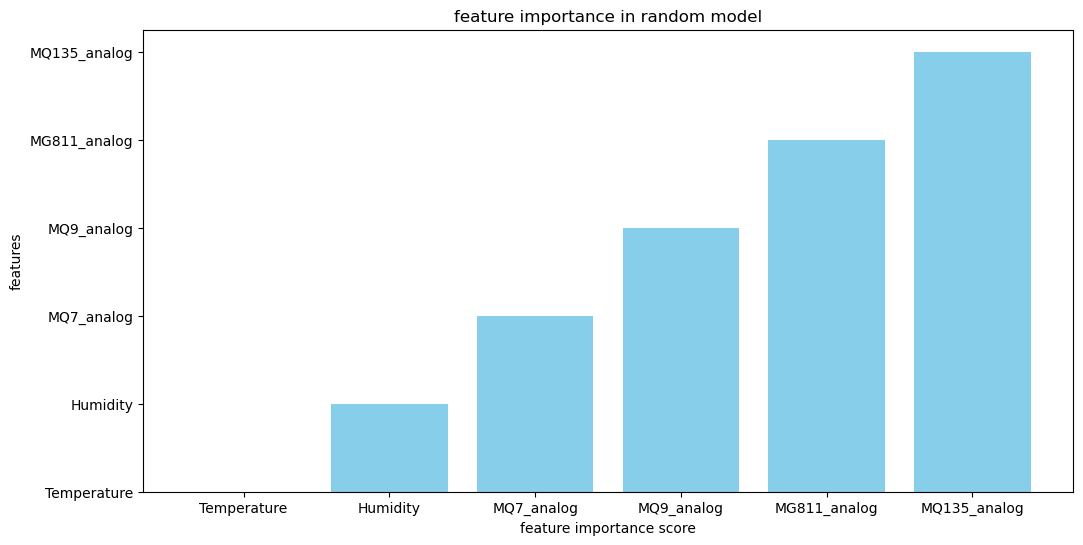

In [74]:
# plot feature importance
plt.figure(figsize=(12,6))
plt.bar(importance_df['Feature'],importance_df['Importance'],color ='skyblue')
plt.xlabel('feature importance score')
plt.ylabel('features')
plt.title('feature importance in random model')
plt.gca()#. invert_yaxis()
plt.show()

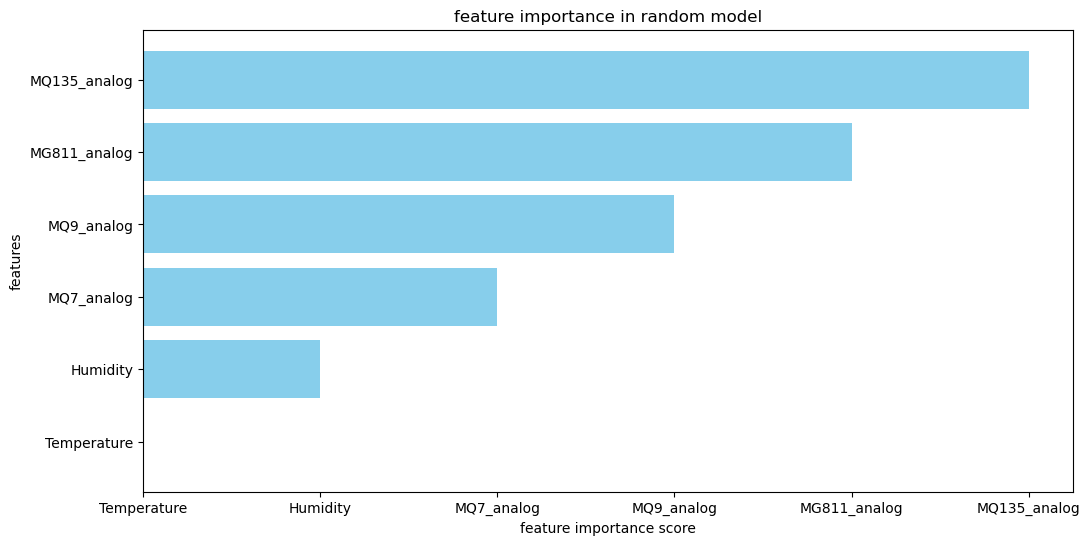

In [75]:
# plot feature importance
plt.figure(figsize=(12,6))
plt.barh(importance_df['Feature'],importance_df['Importance'],color ='skyblue')
plt.xlabel('feature importance score')
plt.ylabel('features')
plt.title('feature importance in random model')
plt.gca()#. invert_yaxis()
plt.show()

In [76]:
# prediction
y_pred = rf.predict(X_test_scaled)

In [77]:
# cal. Rmse
rmse = np.sqrt(mean_squared_error(y_val,y_pred))

In [78]:
print(rmse)

5.054719000892829


In [110]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
important_features = X_train.columns[importances > 0.01]  # Keep only relevant features
X_train = X_train[important_features]
X_val = X_val[important_features]


In [111]:
# split into training and testing data
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Model training: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [80]:
# Validation
val_predictions = rf_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"Validation RMSE: {val_rmse:.2f}")

Validation RMSE: 5.02


In [81]:
X_train

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog
6302,28.695,71.710,4054.0,4163.5,3171.0,2949.5
7038,30.460,70.890,6561.0,7190.0,2523.0,3705.0
640,32.985,58.135,3246.5,2038.5,5911.5,3293.0
6153,29.155,70.150,5992.0,5815.0,4737.5,4464.5
1755,31.910,66.555,4173.0,2783.0,4557.5,2974.5
...,...,...,...,...,...,...
5191,28.695,71.800,4056.0,4174.0,3177.0,2949.0
5226,28.120,68.800,5914.5,5468.0,4549.5,4229.0
5390,29.975,65.595,5809.0,5724.5,4640.0,4418.0
860,31.640,58.150,2861.0,1669.0,4468.0,3577.0


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# using gradient boost
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()
ensemble = VotingRegressor([('rf', best_model), ('gbm', gbm)])
ensemble.fit(X_train, y_train)


In [ ]:
# hyperparameter tunning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [10, 20, 30],         # Tree depth
    'min_samples_split': [2, 5, 10],   # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]      # Minimum samples per leaf
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_


In [29]:
#creating a new features

In [36]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
train_data

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,alpha,585.75
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,alpha,613.00
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,alpha,616.50
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,alpha,642.50
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,alpha,622.00
...,...,...,...,...,...,...,...,...,...
7302,ID_007303,30.285,64.640,5555.5,5483.5,4599.5,4190.0,charlie,604.00
7303,ID_007304,28.155,68.780,6128.5,5699.0,4720.0,4413.5,charlie,641.50
7304,ID_007305,27.950,69.550,5867.0,5515.0,4578.5,4244.0,charlie,638.50
7305,ID_007306,28.620,71.740,5888.5,5756.0,4697.0,4407.0,charlie,602.00


In [31]:
train_data['Temp_humidity_ratio'] = train_data['Temperature'] / (train_data['Humidity'] + 1)

In [61]:
train_data['Mean_MQ'] = (train_data['MQ7_analog'] + train_data['MQ9_analog'] + train_data['MQ135_analog']) /3

In [94]:
train_data['Mean_analog'] = (train_data['MQ7_analog'] + train_data['MQ9_analog'] + train_data['MQ135_analog'] + train_data['MG811_analog']) /4

In [95]:
train_data

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,CO2,Temp_humidity_ratio,Mean_MQ,Mean_analog
0,ID_000001,28.975,74.475,2480.0,3476.5,1572.0,1997.0,alpha,585.75,0.383902,2651.166667,2381.375
1,ID_000002,31.900,66.500,3813.0,2726.0,4145.0,3180.0,alpha,613.00,0.472593,3239.666667,3466.000
2,ID_000003,31.675,60.015,2811.0,1563.5,4250.0,2708.5,alpha,616.50,0.519135,2361.000000,2833.250
3,ID_000004,31.580,59.220,2844.0,1597.0,4310.0,2723.0,alpha,642.50,0.524410,2388.000000,2868.500
4,ID_000005,31.690,62.030,3159.5,1120.5,5519.5,1219.0,alpha,622.00,0.502776,1833.000000,2754.625
...,...,...,...,...,...,...,...,...,...,...,...,...
7302,ID_007303,30.285,64.640,5555.5,5483.5,4599.5,4190.0,charlie,604.00,0.461380,5076.333333,4957.125
7303,ID_007304,28.155,68.780,6128.5,5699.0,4720.0,4413.5,charlie,641.50,0.403482,5413.666667,5240.250
7304,ID_007305,27.950,69.550,5867.0,5515.0,4578.5,4244.0,charlie,638.50,0.396173,5208.666667,5051.125
7305,ID_007306,28.620,71.740,5888.5,5756.0,4697.0,4407.0,charlie,602.00,0.393456,5350.500000,5187.125


In [102]:
# Feature selection and preprocessing
features = ['Humidity', 'MG811_analog', 'MQ135_analog','Temp_humidity_ratio','Mean_MQ','Temperature','MQ7_analog','MQ9_analog']
target = 'CO2'

In [103]:
# splitting the dataset 
X = train_data[features]
y = train_data[target]

In [104]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
# Model training: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [132]:
# Validation
val_predictions = rf_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"Validation RMSE: {val_rmse:.2f}")

Validation RMSE: 5.00


In [133]:
test_data['Temp_humidity_ratio'] = train_data['Temperature'] / (train_data['Humidity'] + 1)

In [134]:
test_data['Mean_MQ'] = (train_data['MQ7_analog'] + train_data['MQ9_analog'] + train_data['MQ135_analog']) /3

In [135]:
test_data['Mean_analog'] = (train_data['MQ7_analog'] + train_data['MQ9_analog'] + train_data['MQ135_analog'] + train_data['MG811_analog']) /4

In [136]:
test_data

,ID,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,device_name,Mean_MQ,Mean_analog,Temp_humidity_ratio
0,ID_007308,32.450,59.990,3504.0,1380.0,2642.5,1637.0,alpha,2651.166667,2381.375,0.383902
1,ID_007309,31.665,58.640,2864.0,1659.0,4456.0,3564.5,alpha,3239.666667,3466.000,0.472593
2,ID_007310,31.755,59.000,2850.5,1615.0,4391.0,2683.5,alpha,2361.000000,2833.250,0.519135
3,ID_007311,31.860,66.850,3853.5,2868.5,4170.5,3025.5,alpha,2388.000000,2868.500,0.524410
4,ID_007312,29.600,73.115,2506.5,3631.5,1481.5,2112.5,alpha,1833.000000,2754.625,0.502776
...,...,...,...,...,...,...,...,...,...,...,...
1287,ID_008595,28.130,70.395,6318.5,6025.5,4891.5,4649.0,charlie,2063.833333,2254.625,0.518814
1288,ID_008596,25.500,86.310,4344.0,4383.0,4250.0,3210.0,charlie,2206.000000,2296.750,0.536973
1289,ID_008597,31.295,65.575,6765.0,7167.0,2566.0,3682.5,charlie,2302.000000,2767.500,0.520796
1290,ID_008598,28.380,72.340,4025.0,4106.0,3181.0,2937.0,charlie,2446.000000,3021.375,0.538520


In [137]:
# Test predictions
test_features = test_data[features]
test_predictions = rf_model.predict(test_features)

In [138]:
# Prepare submission
sample_submission['CO2'] = test_predictions
sample_submission.to_csv('submission4.csv', index=False)
print("Submission file saved as 'submission4.csv'")

Submission file saved as 'submission4.csv'
